In [31]:
#import niezbędnych biliotek 

import pandas as pd
import numpy as np
import scipy.stats as st
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [32]:
#wczytanie pliku csv (zbioru danych) do zmiennej
pokemon_data = pd.read_csv('datasets_121_280_Pokemon.csv')



In [33]:
#nadanie wnazwy 'id' pierwszej kolumnie zamiast znaku "#"

columns = pokemon_data.columns.tolist()
columns[0] = 'id'
pokemon_data.columns = columns

In [34]:
#wyświetlenie ilości wierszy i kolumn
print(f'Ilość wierszy: {pokemon_data.shape[0]}')
print(f'Ilość kolumn: {pokemon_data.shape[1]}')

Ilość wierszy: 800
Ilość kolumn: 13


In [35]:
#wyświetlenie informacjo o naszym zbiorze danych
pokemon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [36]:
#opis danych numerycznych ze zbioru danych
pokemon_data.describe()

,id,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [37]:
#wyświetlenie pierwszych 10 pozycji zbioru danych
pokemon_data.head(10)

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [38]:
#wyświetlenie ostatnich 10 pozycji zbioru danych ( jakieś dziwne te nowe pokemony są ¯\_(ツ)_/¯ )
pokemon_data.tail(10)

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [39]:
#wyświetlenie w jednej tabeli pierwszych 10 pozycji ze zbioru danych i 10 ostatnich pozycji
h = pokemon_data.head(10)
t = pokemon_data.tail(10)
result = pd.concat([h,t])
display(result)

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [40]:
#jak widać poyżej, nasz zbiór danych obejmuje 6 generacji pokemonów. Ale ten czas leci...

In [41]:
#wyswietlenie ilości pokemonów ze względu na typy a dokładniej główny (pierwszy) typ pokemona. 
print(pokemon_data['Type 1'].value_counts(dropna=False))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [42]:
#wyświetlenie wszystkich legendarnych pokemonów
display(pokemon_data[pokemon_data.Legendary])

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [43]:
#wyświetlenie pokemonów o najwyższych statystykach w poszczególnych dziedzinach
print("MAX HP")
pokemon_data[pokemon_data['HP']==max(pokemon_data['HP'])]

MAX HP


,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False


In [44]:
print("MAX Total")
pokemon_data[pokemon_data['Total']==max(pokemon_data['Total'])]

MAX Total


,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


In [45]:
print("MAX Attack")
pokemon_data[pokemon_data['Attack']==max(pokemon_data['Attack'])]

MAX Attack


,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [46]:
print("MAX Defense")
pokemon_data[pokemon_data['Defense']==max(pokemon_data['Defense'])]

MAX Defense


,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False


In [47]:
print("MAX Speed")
pokemon_data[pokemon_data['Speed']==max(pokemon_data['Speed'])]

MAX Speed


,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


In [48]:
print("MAX Sp. Atk")
pokemon_data[pokemon_data['Sp. Atk']==max(pokemon_data['Sp. Atk'])]

MAX Sp. Atk


,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


In [49]:
print("MAX Sp. Def")
pokemon_data[pokemon_data['Sp. Def']==max(pokemon_data['Sp. Def'])]

MAX Sp. Def


,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


In [50]:
#wyświetlenie średnich wartości statystyk dla każdego typu pokemonów

stats_df = pokemon_data.groupby('Type 1').mean()
display(stats_df)


,id,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,449.529412,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,363.851852,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


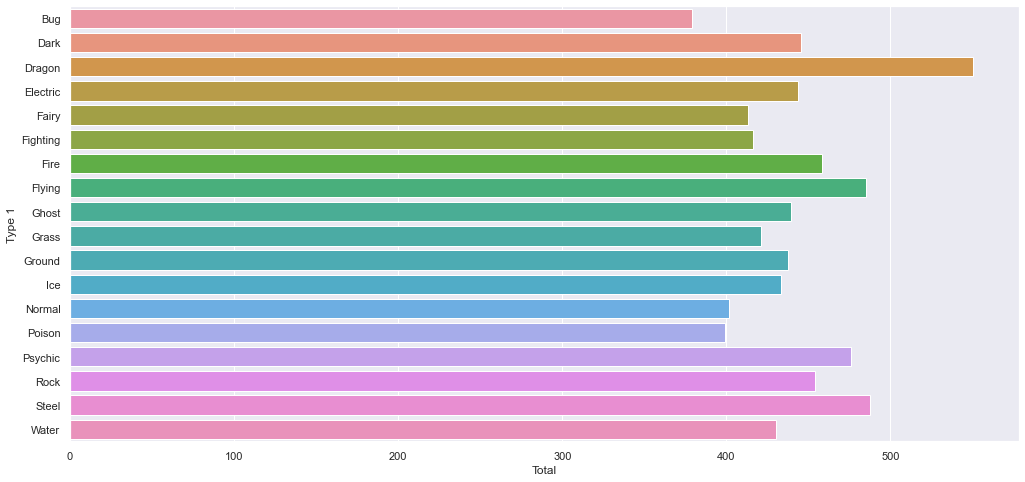

In [51]:
#wyświetlenie wykresów śednich statystyk Total dla każdego typu pokemonów

plt.figure(figsize= (17,8))

sns.barplot(x = 'Total', y='Type 1', data=stats_df.reset_index())

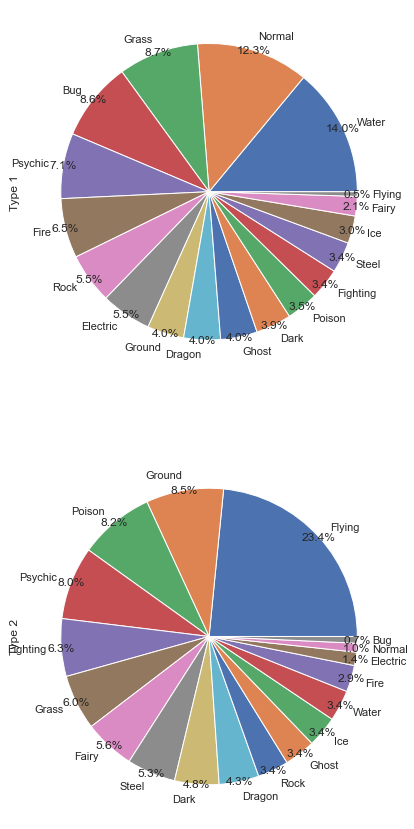

In [52]:
#wyświetlenie wykresu kołowego przedstawiającego procentowy udział typów pokemonów
#dla Typu pierwszego (Type 1), oraz typu drugiego (Type 2)

fig = plt.figure(figsize=(15,15))

fig.add_subplot(211)
pokemon_data['Type 1'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=1.0)

fig.add_subplot(212)
pokemon_data['Type 2'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=1.0)

plt.show()


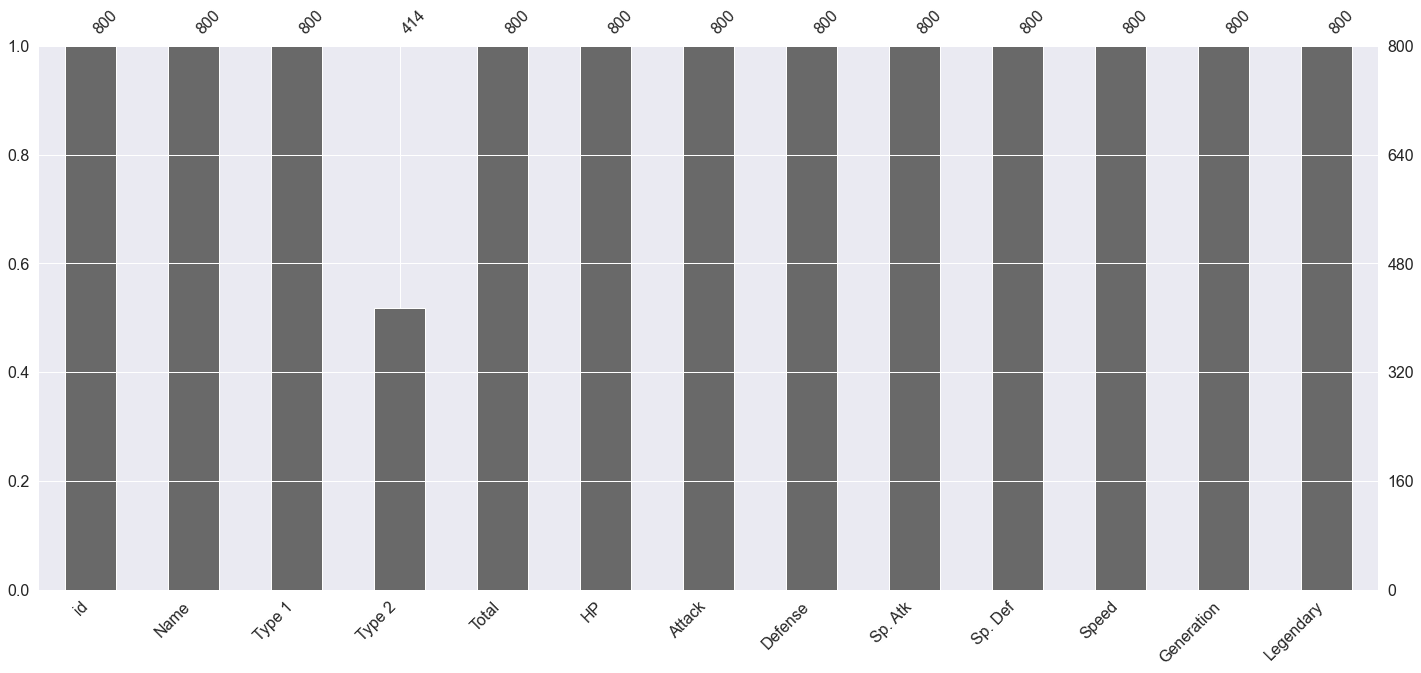

In [53]:
#Przedstawienie w postaci wykresu słupkowego kolumn (najmniejsza kolumna posiada brakujące wartośći)
msno.bar(pokemon_data)

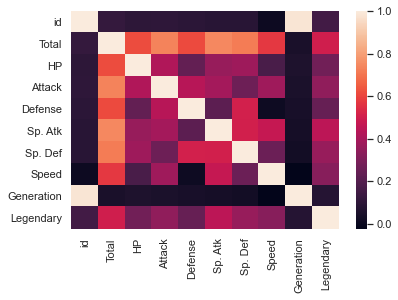

In [54]:
# Korelacje między wartościami numerycznymi
sns.heatmap(pokemon_data.corr())